<Figure size 432x288 with 0 Axes>

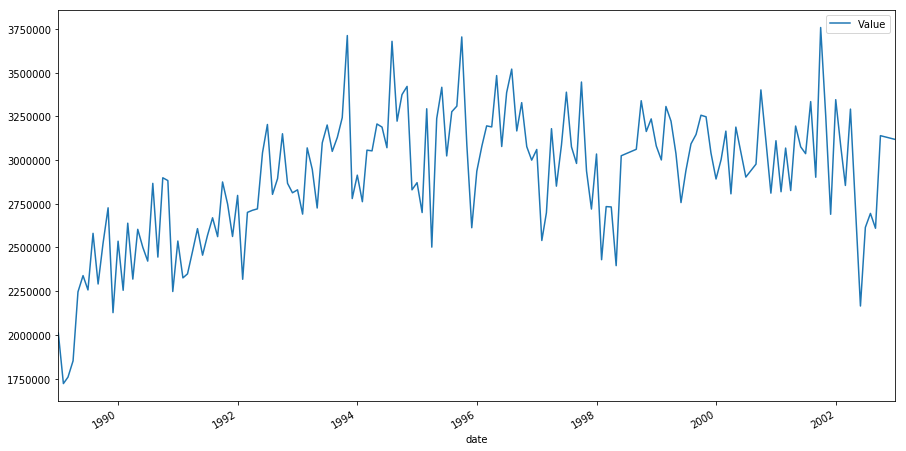

In [200]:
import os, sys, json, math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

    
    
def part_2a(df):
    
    df['date'] = df['reference_period_desc'] + df['year']		# add 'year' to 'reference period' for full date
    df['date'] = pd.to_datetime(df['date'])						# convert 'date' string to date format
    df['Value'] = df['Value'].apply(to_float)					# convert 'Value' column to float

    fig = plt.figure(); df.plot(x='date', y='Value', style='-', figsize=(15,8))
    plt.xlim(pd.Timestamp('1989-01-01'), pd.Timestamp('2002-12-31'))
    plt.show(); plt.close(fig)

    
def part_3a(df):
    return 1

def part_3b(df):
    return 1

def part_3c(df):
    return 1

def part_3d(df):
    return 1

def part_3e(df):
    return 1


def to_float(x):
    num = x.replace(",", "")
    return float(num)


def to_dataframe(file_name):
    json_df = pd.read_json(os.getcwd() + "/" + file_name)	# read json file to dataframe
    return json_df['data'].apply(pd.Series)					# turn 'data' column into its own dataframe


if __name__ == "__main__":
    file = 'data.json'
    df = to_dataframe(file)
    part_2a(df)
    part_2a(df)
    part_2a(df)
    part_2a(df)
    part_2a(df)
    part_2a(df)
    